In [2]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)


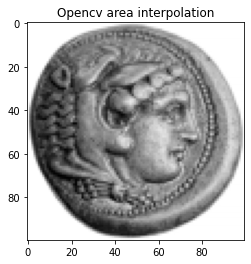

In [3]:
path = "coin.jpg"

pil_img = Image.open("coin.jpg").convert('L')
pil_img = pil_img.resize((100, 100))
np_img = np.array(pil_img)

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (350,350),
                interpolation=cv2.INTER_AREA)
cv_img_a = cv2.resize(img, (100,100),
                    interpolation=cv2.INTER_AREA)
plt.imshow(cv_img_a, cmap='gray')

"""
best interpolation method is area
"""
plt.title("Opencv area interpolation")
plt.show()

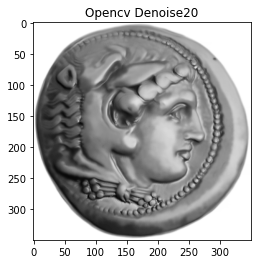

In [4]:

my_h= 20
dstf = cv2.fastNlMeansDenoising(src=img,dst=None,h=my_h)
plt.imshow(dstf, cmap='gray')
plt.title("Opencv Denoise" + str(my_h))
plt.show()


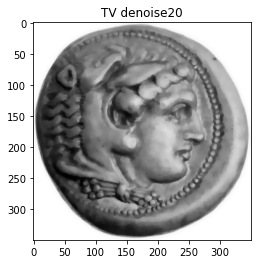

In [37]:
my_tv_weight = 0.1
dtv = denoise_tv_chambolle(image=img,
                           weight=my_tv_weight)
plt.imshow(dtv, cmap='gray')
plt.title("TV denoise" + str(my_h))
plt.show()

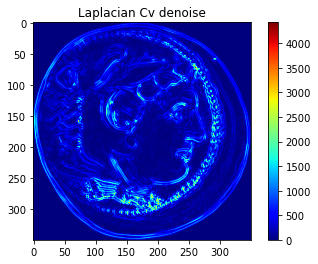

In [17]:
kernel_size = 5
laplacian = np.abs(cv2.Laplacian(dstf,ddepth=cv2.CV_64F,
                          ksize=kernel_size,borderType=cv2.BORDER_REFLECT))
plt.imshow(laplacian, cmap='jet')
plt.title("Laplacian Cv denoise")
plt.colorbar()
plt.show()


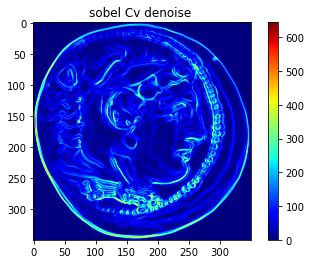

In [43]:
sobel_kernel_size = 3
sobel_x = cv2.Sobel(dstf, dx=1, dy=0, ddepth=cv2.CV_64F,
                           ksize=sobel_kernel_size, borderType=cv2.BORDER_REFLECT)
sobel_y = cv2.Sobel(dstf, dx=0, dy=1, ddepth=cv2.CV_64F,
                           ksize=sobel_kernel_size, borderType=cv2.BORDER_REFLECT)

grad_correct = np.sqrt((sobel_x **2 + sobel_y**2))
plt.imshow(grad_correct, cmap='jet')
plt.title("sobel Cv denoise ")
plt.colorbar()
plt.show()

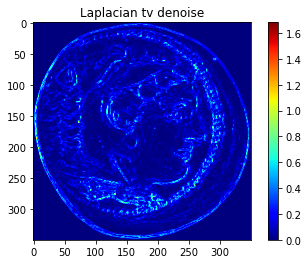

In [23]:
kernel_size = 3
tvlaplacian = np.abs(cv2.Laplacian(dtv,ddepth=cv2.CV_64F,
                          ksize=kernel_size,borderType=cv2.BORDER_REFLECT))
plt.imshow(tvlaplacian, cmap='jet')
plt.title("Laplacian tv denoise")
plt.colorbar()
plt.show()

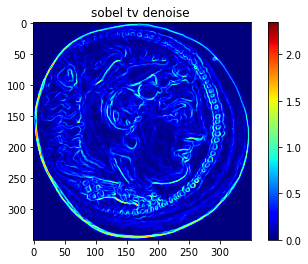

In [16]:
sobel_kernel_size = 3
sobel_x = cv2.Sobel(dtv, dx=1, dy=0, ddepth=cv2.CV_64F,
                           ksize=sobel_kernel_size, borderType=cv2.BORDER_REFLECT)
sobel_y = cv2.Sobel(dtv, dx=0, dy=1, ddepth=cv2.CV_64F,
                           ksize=sobel_kernel_size, borderType=cv2.BORDER_REFLECT)

tvgrad_correct = np.sqrt((sobel_x **2 + sobel_y**2))
plt.imshow(tvgrad_correct, cmap='jet')
plt.title("sobel tv denoise ")
plt.colorbar()
plt.show()

# So openCv's denoise is better!

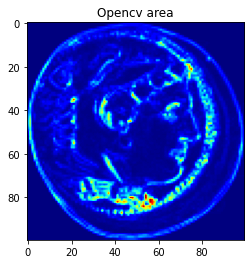

In [17]:
cv_img_a = cv2.resize(laplacian, (100,100),
                    interpolation=cv2.INTER_AREA)
plt.imshow(cv_img_a, cmap='jet')
plt.title("Opencv area")
plt.show()

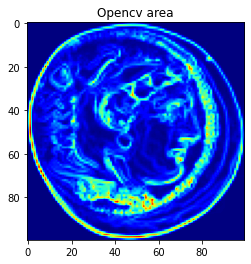

In [18]:
cv_img_a = cv2.resize(grad_correct, (100,100),
                    interpolation=cv2.INTER_AREA)
plt.imshow(cv_img_a, cmap='jet')
plt.title("Opencv area")
plt.show()

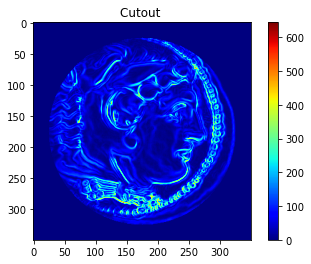

In [21]:
hh, ww = grad_correct.shape

ycen = hh // 2
xcen = ww // 2


mask1 = np.zeros_like(laplacian)
mask1 = cv2.circle(mask1,center=(ycen,xcen),radius=150,color=1,thickness=-1)
masked2 = np.where(mask1 == 1, grad_correct, 0)
plt.imshow(masked2, cmap='jet')
plt.title("Cutout ")
plt.colorbar()
plt.show()

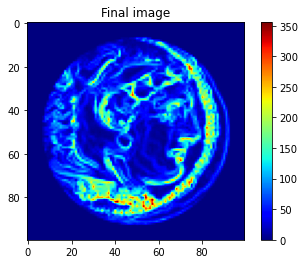

In [22]:
final = cv2.resize(masked2, (100,100),
                    interpolation=cv2.INTER_AREA)
plt.imshow(final, cmap='jet')
plt.title("Final image")
plt.colorbar()
plt.show()

Summary:
- Load image as greyscale
- Scale the image to 350x350
- Denoise using cv
- Apply sobel or laplacian
- Do the masking
- Scale the image to 100x100
- save
